In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

from IPython.display import display

In [2]:
def visualisation(dataset, save = False):
    df = pd.read_csv(f'../Data/grouped_dataset_{dataset}.csv', keep_default_na=False)
    
    readability_scores = ['flesch', 'flesch_kincaid', 'smog_index', 'coleman_liau', 'automated_readability', 'difficult_words', 'dale_chall', 'linsear', 'gunning_fog']
    
    display(df[readability_scores].describe().transpose())
    
    box_plot(df, readability_scores, save)
#     violin_plot(df, readability_scores)

In [3]:
def box_plot(df, readability_scores, save):
    """
    boxplots for all readability score
    
    df: dataframe of articles
    text_structure: name of readability score columns
    """
    
    fig, axs = plt.subplots(3, 3, figsize=(15, 20))
    axs = axs.flatten()

    for index, score in enumerate(readability_scores):
    #     df.boxplot(column=feature, by='2_classes', ax=axs[index])
        sns.boxplot(x='2_classes', y=score, data=df, ax=axs[index])
        axs[index].set_title(f'Boxplot for {score} By Quality', fontdict={"fontsize":16}, pad=10)
        axs[index].set_xlabel('Quality', fontsize=16)
        axs[index].set_ylabel(f'{score}', fontsize=16)
        axs[index].tick_params(axis='both', which='major', labelsize=12)


    plt.tight_layout(pad=3.0)
    
    if save and df.shape[0] == 15998:
        plt.savefig(f"../Report/Image/readability_Boxplot", dpi=300, bbox_inches='tight', transparent=True)
    else:
        plt.savefig(f"../Report/appendix/readability_Boxplot", dpi=300, bbox_inches='tight', transparent=True)

    plt.show()

In [4]:
def violin_plot(df, readability_scores):
    """
    violin plots for all readability score
    
    df: dataframe of articles
    text_structure: name of readability score columns
    """

    fig, axs = plt.subplots(3, 3, figsize=(15, 20))
    axs = axs.flatten()

    for index, score in enumerate(readability_scores):
        sns.violinplot(x='2_classes', y=score, data=df, ax=axs[index])
        axs[index].set_title(f'Violin Plot for {score} By Quality', fontdict={"fontsize":14}, pad=10)
        axs[index].set_xlabel('Quality', fontsize=16)
        axs[index].set_ylabel(f'{score}', fontsize=16)
        axs[index].tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout(pad=3.0)
    plt.show()

# Imbalance Class

,count,mean,std,min,25%,50%,75%,max
flesch,15403.0,49.859679,10.442075,-52.38,43.320000,50.460000,57.500,120.21
flesch_kincaid,15403.0,11.541732,1.920213,-3.10,10.300000,11.400000,12.600,36.50
smog_index,15403.0,13.407427,1.939146,0.00,12.400000,13.400000,14.500,24.10
coleman_liau,15403.0,12.444291,1.731584,-16.11,11.310000,12.360000,13.410,33.00
automated_readability,15403.0,14.148120,2.133222,-8.80,12.900000,14.000000,15.300,47.70
difficult_words,15403.0,509.152633,435.322692,0.00,179.000000,383.000000,717.000,3438.00
dale_chall,15403.0,8.672601,0.925734,6.08,8.040000,8.560000,9.180,19.58
linsear,15403.0,13.912199,4.396783,0.00,11.166667,13.333333,16.000,79.00
gunning_fog,15403.0,11.929337,1.712330,0.80,10.880000,11.770000,12.775,39.43


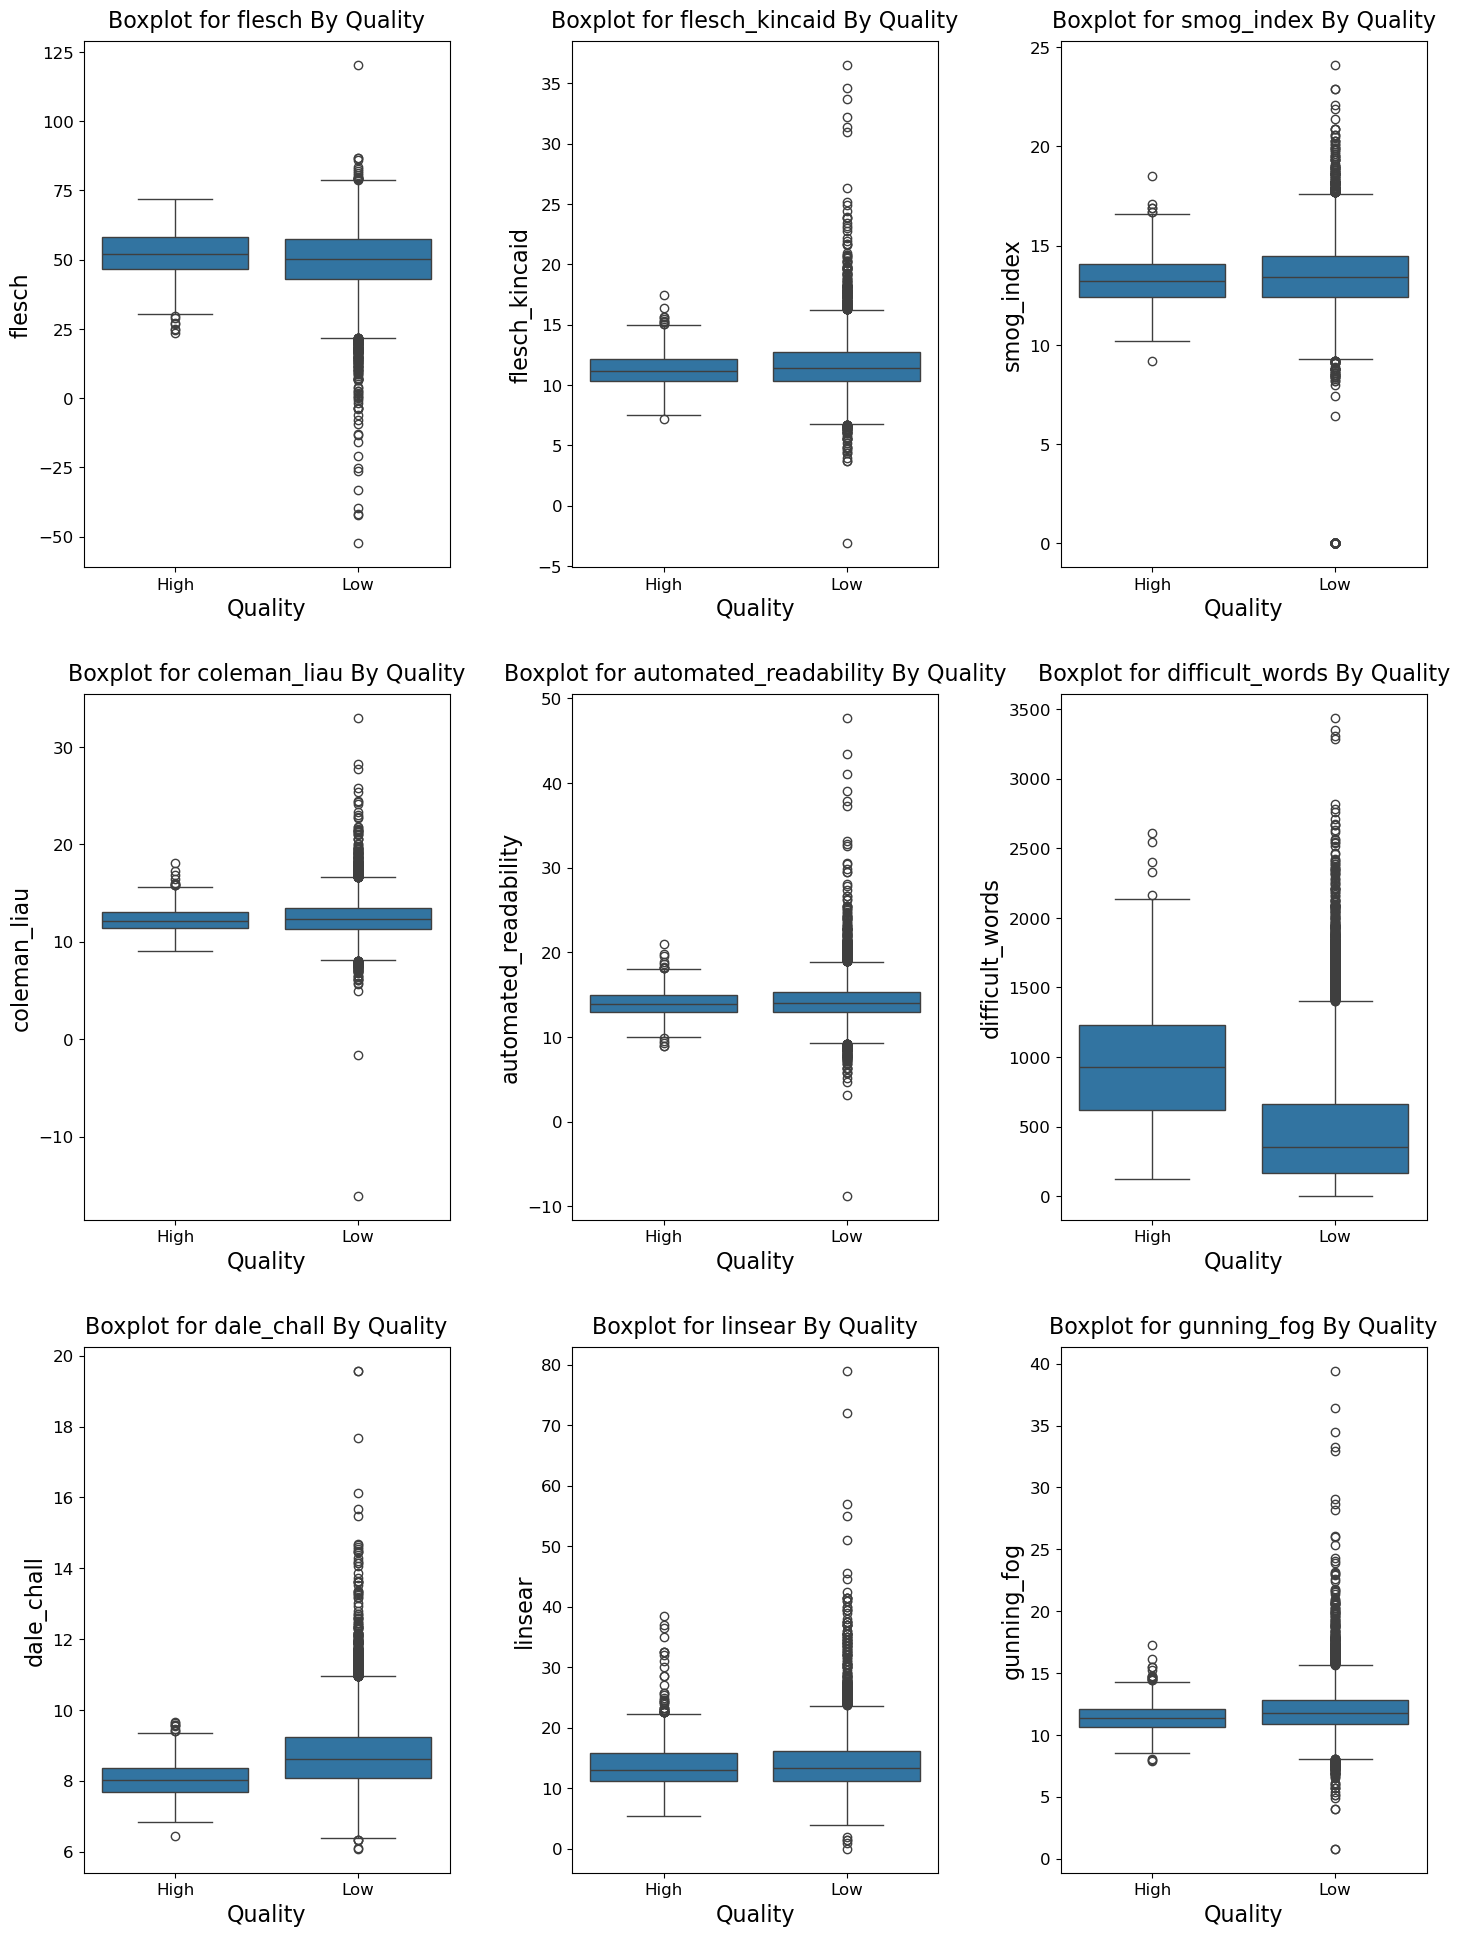

In [5]:
visualisation("(Imbalance)")

# Balance Class

,count,mean,std,min,25%,50%,75%,max
flesch,15998.0,45.157420,26.904864,-414.72,42.00,51.070000,57.91,89.75
flesch_kincaid,15998.0,12.010720,6.414398,2.50,10.00,11.200000,12.70,190.10
smog_index,15998.0,11.831798,4.366576,0.00,11.70,12.800000,13.90,42.70
coleman_liau,15998.0,13.164931,3.425255,1.30,11.54,12.650000,13.87,65.10
automated_readability,15998.0,14.856970,8.143045,2.70,12.70,14.100000,15.70,245.40
difficult_words,15998.0,569.268971,554.328539,1.00,123.00,402.000000,869.00,2904.00
dale_chall,15998.0,9.266416,2.682917,6.07,7.87,8.360000,9.30,31.78
linsear,15998.0,12.585990,6.546205,0.50,9.00,12.333333,15.00,87.00
gunning_fog,15998.0,12.678360,7.189056,4.32,10.34,11.400000,12.77,194.44


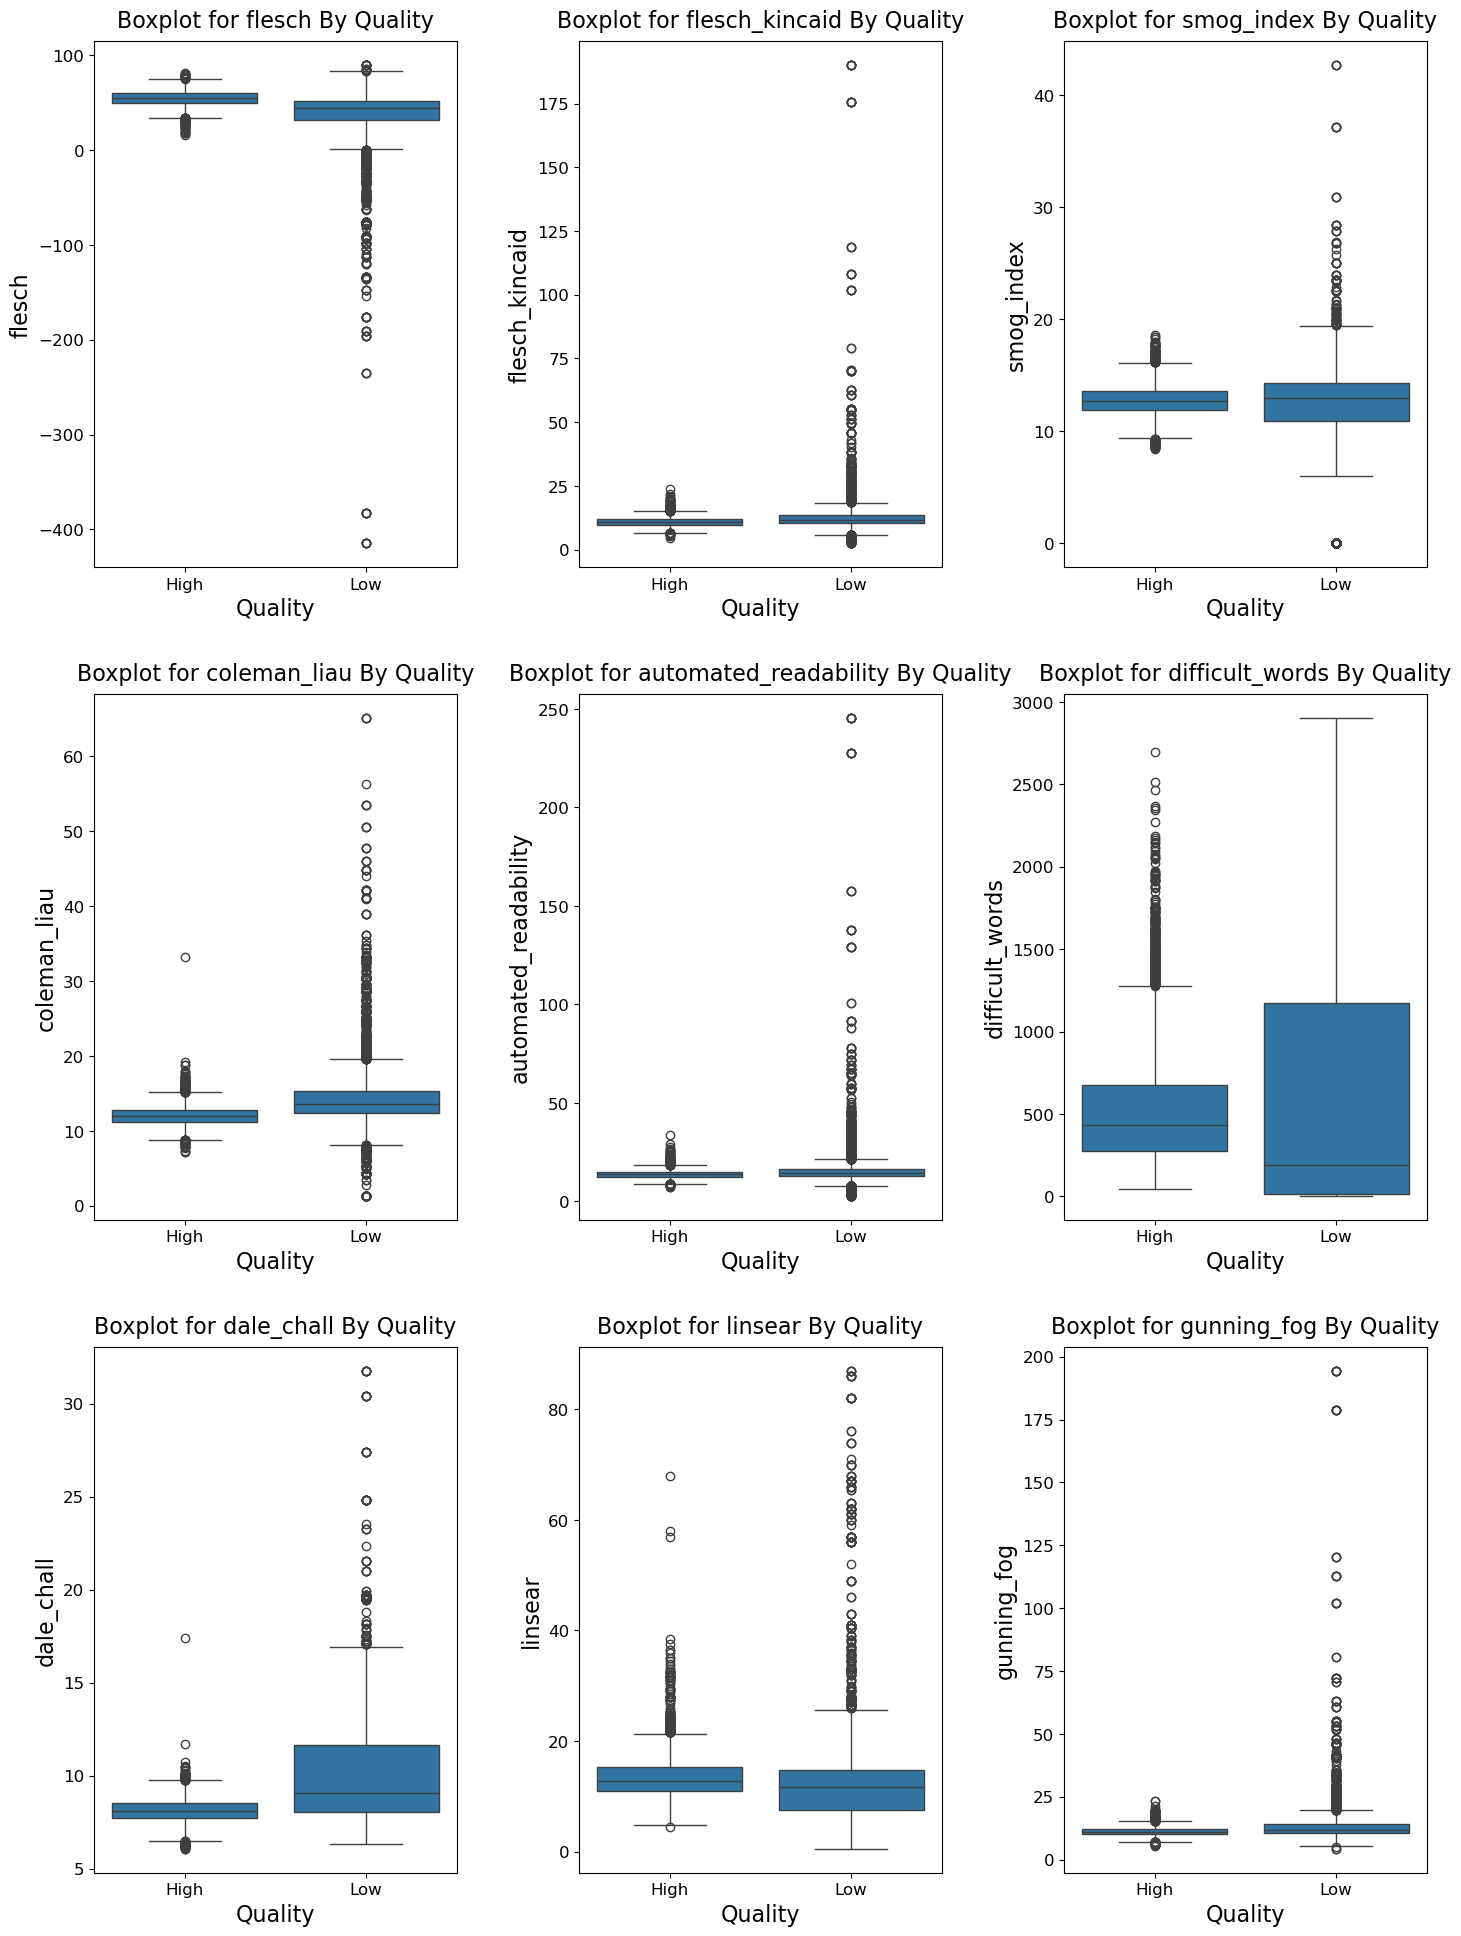

In [6]:
visualisation("(Balance)", save = True)